<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.
<img src="img/0.png">
**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<img src="img/holt.png">

1) ближе к нулю (больший вес старым изменениям в тренде) <br>
2) ближе к единице (больший вес самым последним изменениям в тренде)

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<Ответ>

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>

<h1 align="left">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wages = pd.read_csv('data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

In [2]:
wages.head()

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


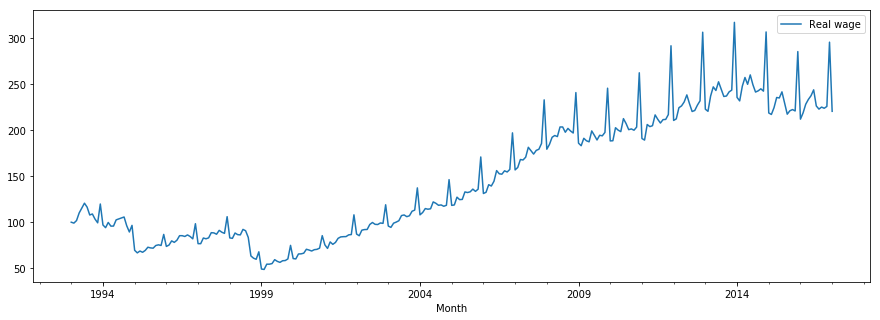

In [3]:
wages.plot(figsize=(15,5))

### There is a multiplicative seasonal trend: each december the wages raises. 
### There is also a global wages raising linear trend.

In [4]:
ts1 = pd.read_csv('data/TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts2 = pd.read_csv('data/TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts3 = pd.read_csv('data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

In [5]:
ts1.head()

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0,0,"2,484",0,0.0,"1,334",1,1,2.0,0,...,7,12,0,"66,324","32,864",12,23,63,14,177
2005-05-13,"0,878","0,983","2,632","1,12",1.0,"3,514",4,0,1.0,0,...,16,17,0,"69,952","34,024",24,30,97,13,63
2005-05-14,"0,332","1,346","2,016","0,302",1.0,"2,59",0,2,0.0,1,...,11,12,0,"35,366","31,626",20,0,80,12,94
2005-05-15,0,"0,556","0,882",0,4.0,"1,708",1,1,1.0,2,...,9,15,0,"37,898","43,726",20,0,64,6,105
2005-05-16,"0,438","0,671","0,314","1,486",2.0,"2,79",3,0,2.0,1,...,11,11,0,"49,566","34,548",23,0,43,4,51


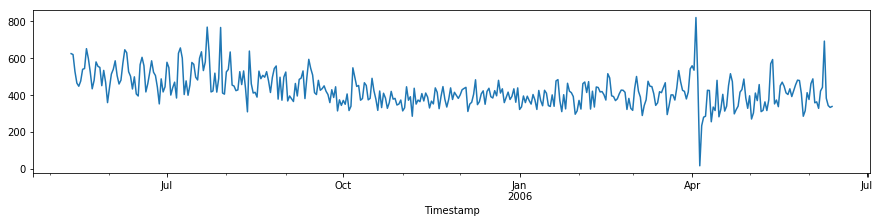

In [6]:
ts1.sum(axis=1).plot(figsize=(15,3))

#### Suppose no seasonal trend for ts1
#### Multiplicative seasonality

In [7]:
ts2.head()

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


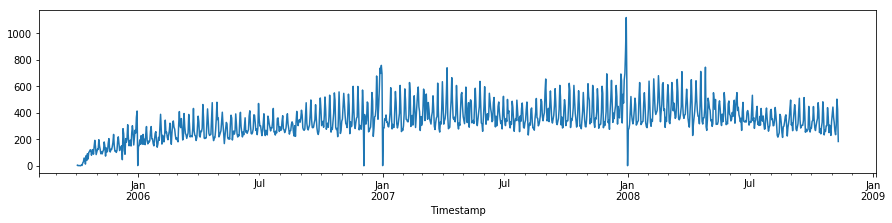

In [8]:
ts2.sum(axis=1).plot(figsize=(15,3))

#### In the end of each december the sales are rising.
#### Multiplicative seasonality, no trend

In [9]:
ts3.head()

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


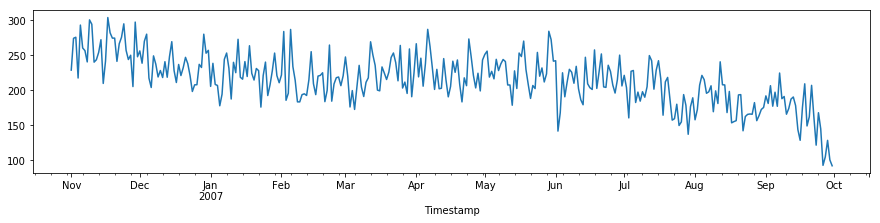

In [10]:
ts3.sum(axis=1).plot(figsize=(15,3))

#### Additive seasonality, no trend

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [11]:
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast

In [12]:
ALPHA = np.linspace(0,1,100)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 5} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wages, AlgName='InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

In [13]:
wages.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Month', length=289, freq=None)

In [14]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wages.columns, columns = FRC_WAGE.keys())

ix = wages.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wages.loc[ix], frc_wage.loc[ix])

QualityStr.mean().sort_values()[:10]

IES {'AdaptationPeriod': 5, 'alpha': 0.393939393939394}      0.058482
IES {'AdaptationPeriod': 5, 'alpha': 0.38383838383838387}    0.058485
IES {'AdaptationPeriod': 5, 'alpha': 0.4040404040404041}     0.058492
IES {'AdaptationPeriod': 5, 'alpha': 0.37373737373737376}    0.058504
IES {'AdaptationPeriod': 5, 'alpha': 0.4141414141414142}     0.058510
IES {'AdaptationPeriod': 5, 'alpha': 0.42424242424242425}    0.058535
IES {'AdaptationPeriod': 5, 'alpha': 0.36363636363636365}    0.058556
IES {'AdaptationPeriod': 5, 'alpha': 0.43434343434343436}    0.058571
IES {'AdaptationPeriod': 5, 'alpha': 0.4444444444444445}     0.058659
IES {'AdaptationPeriod': 5, 'alpha': 0.3535353535353536}     0.058659
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

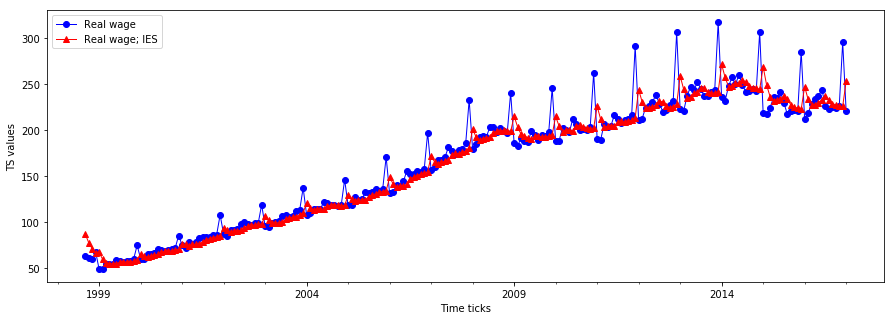

In [15]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wages.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01'], alg_title='IES')

** Question**
    * Does SES follow to the TS components?
### No:
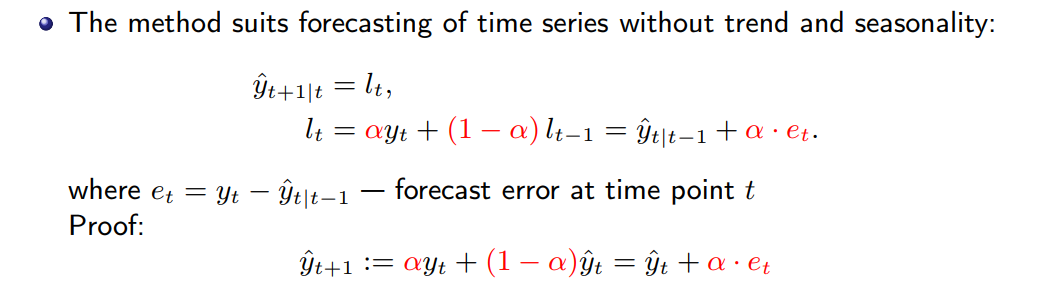

### But there is a trend and a seasonality.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [16]:
qualityMAPE(wages.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.061941
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

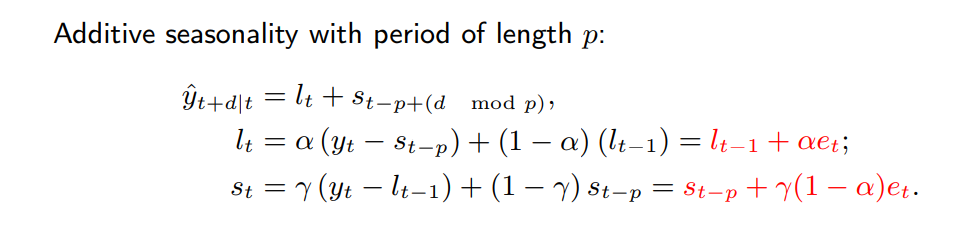

Season - once a year - in december. Period - 12.

In [17]:
ALPHA, DELTA = np.linspace(1.0/30,1,30), np.linspace(1.0/30,1,30)
params = [{'alpha': alpha, 'delta':delta,\
           'seasonality_period': 12} for alpha in ALPHA for delta in DELTA]
params[:5]

[{'alpha': 0.03333333333333333,
  'delta': 0.03333333333333333,
  'seasonality_period': 12},
 {'alpha': 0.03333333333333333,
  'delta': 0.06666666666666667,
  'seasonality_period': 12},
 {'alpha': 0.03333333333333333, 'delta': 0.1, 'seasonality_period': 12},
 {'alpha': 0.03333333333333333,
  'delta': 0.13333333333333333,
  'seasonality_period': 12},
 {'alpha': 0.03333333333333333,
  'delta': 0.16666666666666666,
  'seasonality_period': 12}]

In [18]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.nan] * (T+h)
    
    l= np.nan#x[0]# initialize ts level 
    s= x[:p]# initalize seasonality values (it must be vector of lenth p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr % p]# initialize 
 
            l = alpha*(x[cntr]-s[cntr%p]) + (1-alpha)*l# recurrent smoothing of level 
            s[cntr % p] = delta * (x[cntr] - l) + (1-delta)*s[cntr%p]# recurrent smoothing of seasonality
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

In [19]:
FCST_WES = BuildForecast(h=1, ts=wages, AlgName='WintersExponentialSmoothing', AlgTitle='WES', ParamsArray=params, useTqdm=True)

100%|██████████| 900/900 [00:44<00:00, 20.04it/s]


In [20]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wages.columns, columns = FCST_WES.keys())

ix = wages.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FCST_WES[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wages.loc[ix], frc_wage.loc[ix])

QualityStr.mean().sort_values()[:10]

WES {'alpha': 0.5333333333333333, 'delta': 1.0, 'seasonality_period': 12}                   0.028126
WES {'alpha': 0.5666666666666667, 'delta': 1.0, 'seasonality_period': 12}                   0.028276
WES {'alpha': 0.5333333333333333, 'delta': 0.9666666666666667, 'seasonality_period': 12}    0.028286
WES {'alpha': 0.5666666666666667, 'delta': 0.9666666666666667, 'seasonality_period': 12}    0.028456
WES {'alpha': 0.5333333333333333, 'delta': 0.9333333333333333, 'seasonality_period': 12}    0.028473
WES {'alpha': 0.5, 'delta': 0.9666666666666667, 'seasonality_period': 12}                   0.028502
WES {'alpha': 0.5, 'delta': 0.9333333333333333, 'seasonality_period': 12}                   0.028540
WES {'alpha': 0.5, 'delta': 1.0, 'seasonality_period': 12}                                  0.028620
WES {'alpha': 0.5666666666666667, 'delta': 0.9333333333333333, 'seasonality_period': 12}    0.028652
WES {'alpha': 0.5, 'delta': 0.9, 'seasonality_period': 12}                                 

Works better then simple ES

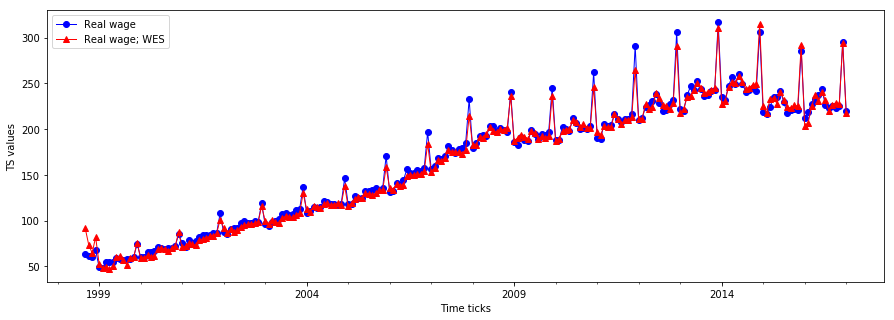

In [21]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wages.loc['1998-09-01':'2017-01-01'], FCST_WES[algName].loc['1998-09-01':'2017-01-01'], alg_title='WES')

Work much better with seasonality

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

<img src="img/theil-wage.png">

In [22]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['season']
    
    FORECAST = [np.nan] * (T+h)
    
    l = x[p]
    b = x[p]#(np.sum(x[p:2*p]) - np.sum(x[:p])) / p ** 2
    s = [np.nan]*(T+h)
    
    for t in range (0,p):
        s[t] = x[t]
    
    for t in range(p,T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l= x[t]# initialize 
            if math.isnan(b):
                b = x[t]
        
            if math.isnan(s[t-p]):
                s[t] = x[t-p]
                   
            l_prev = l
            l = alpha*(x[t] - s[t-p]) + (1-alpha)*(l+b)
            b = beta*(l - l_prev) + (1-beta)*b
            s[t] = gamma*(x[t]-l) + (1-gamma)*s[t-p]
        
        FORECAST[t+h]= (l + b*h) + s[t - p + (h%p)]
    return FORECAST

In [23]:
Alpha = np.linspace(0.01,1,30)
Beta = np.linspace(0.01,1,30)
Gamma = np.linspace(0.01,1,30)
params = [{'alpha': alpha, 'beta':beta, 'gamma': gamma, 'season':12}
                  for alpha in Alpha for beta in Beta for gamma in Gamma]
params[:10]

[{'alpha': 0.01, 'beta': 0.01, 'gamma': 0.01, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.04413793103448276, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.07827586206896552, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.11241379310344828, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.14655172413793105, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.1806896551724138, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.21482758620689657, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.24896551724137933, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.2831034482758621, 'season': 12},
 {'alpha': 0.01, 'beta': 0.01, 'gamma': 0.31724137931034485, 'season': 12}]

In [24]:
import importlib, utils
importlib.reload(utils)
FCST_THW = BuildForecast(h=1, ts=wages, AlgName='TheilWageExponentialSmoothing',\
                         AlgTitle='TWES',ParamsArray = params, useTqdm=True)

100%|██████████| 27000/27000 [08:08<00:00, 55.23it/s]


In [25]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wages.columns, columns = FCST_THW.keys())

ix = wages.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FCST_THW[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wages.loc[ix], frc_wage.loc[ix])

QualityStr.mean().sort_values()[:10]

TWES {'gamma': 0.9317241379310346, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.14655172413793105}    0.034320
TWES {'gamma': 1.0, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.11241379310344828}                   0.034357
TWES {'gamma': 0.9658620689655173, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.14655172413793105}    0.034904
TWES {'gamma': 0.9658620689655173, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.11241379310344828}    0.035198
TWES {'gamma': 0.8975862068965518, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.14655172413793105}    0.035230
TWES {'gamma': 0.863448275862069, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.1806896551724138}      0.035369
TWES {'gamma': 1.0, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.14655172413793105}                   0.035476
TWES {'gamma': 0.8975862068965518, 'season': 12, 'alpha': 0.21482758620689657, 'beta': 0.1806896551724138}     0.035529
TWES {'gamma': 0.9317241379310346, 'seas

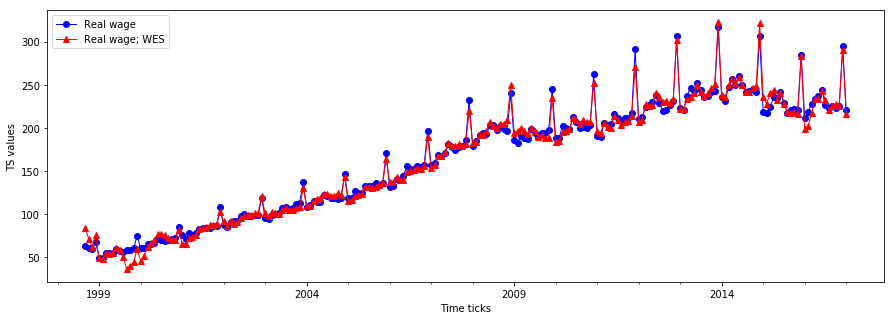

In [26]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wages.loc['1998-09-01':'2017-01-01'], FCST_THW[algName].loc['1998-09-01':'2017-01-01'], alg_title='WES')

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

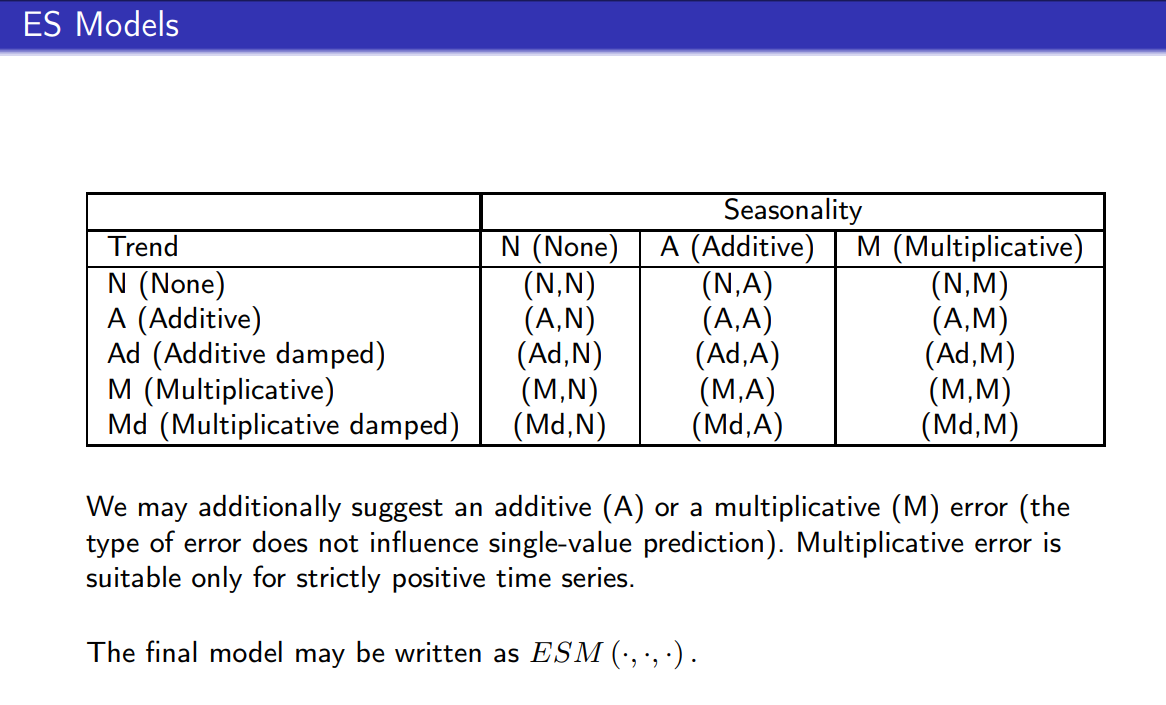

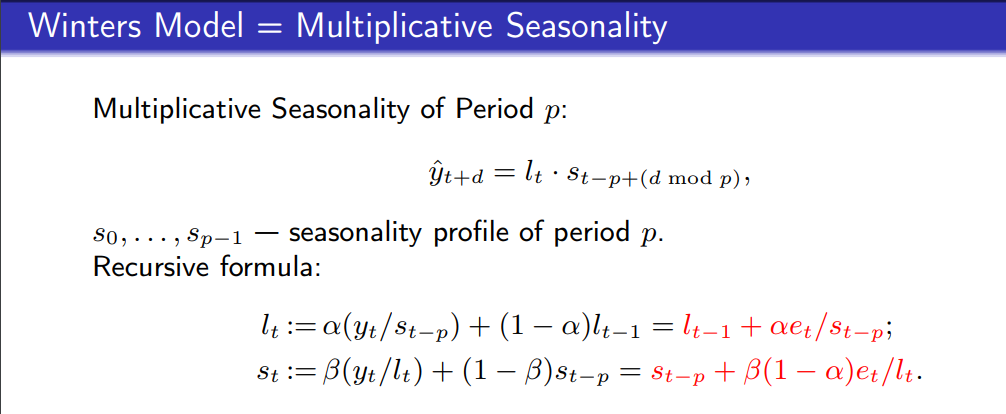

In [27]:
def WintersMultiplicative(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    p = Params['season']
    
    FORECAST = [np.nan] * (T+h)
    
    l = x[p]
    s = [np.nan]*p
    
    for t in range (0,p):
        s[t] = x[t]
    
    for t in range(p,T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l= x[t]# initialize 
        
            if math.isnan(s[t]):
                s[t] = x[t]
        
        if math.isnan(s[t%p]):
            s[t%p] = x[t%p]

        if not math.isnan(x[t]):    
            l = alpha*(x[t]/s[t%p]) + (1-alpha)*l
            s[t] = beta*(x[t]/l) + (1-beta)*s[t%p]
        
        FORECAST[t+h]= l*s[(t+h%p)]
    return FORECAST

In [32]:
Alpha = np.linspace(0.01,1,100)
Beta = np.linspace(0.01,1,100)
params = [{'alpha': alpha, 'beta': beta, 'season': 12} for alpha in Alpha for beta in Beta]
params[:10]

[{'alpha': 0.01, 'beta': 0.01, 'season': 12},
 {'alpha': 0.01, 'beta': 0.02, 'season': 12},
 {'alpha': 0.01, 'beta': 0.03, 'season': 12},
 {'alpha': 0.01, 'beta': 0.04, 'season': 12},
 {'alpha': 0.01, 'beta': 0.05, 'season': 12},
 {'alpha': 0.01, 'beta': 0.060000000000000005, 'season': 12},
 {'alpha': 0.01, 'beta': 0.06999999999999999, 'season': 12},
 {'alpha': 0.01, 'beta': 0.08, 'season': 12},
 {'alpha': 0.01, 'beta': 0.09, 'season': 12},
 {'alpha': 0.01, 'beta': 0.09999999999999999, 'season': 12}]

In [33]:
import importlib, utils
importlib.reload(utils)
FCST_WMES = BuildForecast(h=1, ts=wages, AlgName='WintersMultiplicative',\
                         AlgTitle='WMES',ParamsArray = params, useTqdm=True)

100%|██████████| 10000/10000 [03:46<00:00, 44.09it/s]


In [34]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wages.columns, columns = FCST_WMES.keys())

ix = wages.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FCST_WMES[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wages.loc[ix], frc_wage.loc[ix])

QualityStr.mean().sort_values()[:10]

WMES {'season': 12, 'alpha': 0.72, 'beta': 0.01}                  0.031254
WMES {'season': 12, 'alpha': 0.7100000000000001, 'beta': 0.01}    0.031261
WMES {'season': 12, 'alpha': 0.73, 'beta': 0.01}                  0.031263
WMES {'season': 12, 'alpha': 0.7000000000000001, 'beta': 0.01}    0.031271
WMES {'season': 12, 'alpha': 0.74, 'beta': 0.01}                  0.031274
WMES {'season': 12, 'alpha': 0.6900000000000001, 'beta': 0.01}    0.031287
WMES {'season': 12, 'alpha': 0.75, 'beta': 0.01}                  0.031300
WMES {'season': 12, 'alpha': 0.68, 'beta': 0.01}                  0.031304
WMES {'season': 12, 'alpha': 0.67, 'beta': 0.01}                  0.031321
WMES {'season': 12, 'alpha': 0.76, 'beta': 0.01}                  0.031324
dtype: float64

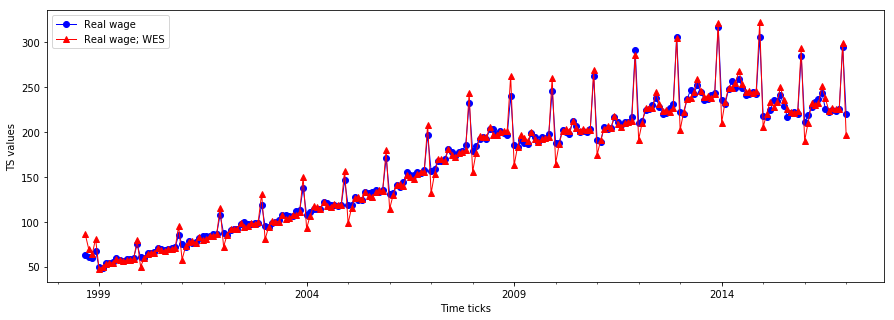

In [35]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wages.loc['1998-09-01':'2017-01-01'], FCST_WMES[algName].loc['1998-09-01':'2017-01-01'], alg_title='WES')